# An overview of the project
We are going to perform Exploratory Data Analysis which is an approach used to uncover insights, patterns and confirm assumptions using statistical summaries and graphical representations. Think of it as being given a sandbox (dataset) and set a tools (our various libraries) like a rake, pike and spade and digging through the sandbox to uncover gems which in this case would be different insights from our data. The dataset we will be working on is the Olympic Games containing records of games all the way from 1896, Athens Olympics to 2016, Rio Olympics.

# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [173]:
#import athlete dataset and print first 5 rows
ath = pd.read_csv(r'C:\Users\Student\Videos\Python DataAnalysis\archive\athlete_events.csv')
ath.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [174]:
#import region dataset and print first 5 rows
regn = pd.read_csv(r'C:\Users\Student\Videos\Python DataAnalysis\archive\noc_regions.csv')
regn.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [176]:
#Join datasets using left join on common column
ath_df = ath.merge(regn, on = 'NOC', how = 'left')

ath_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [177]:
#We drop the notes column as we will not be using it in our analysis
ath_df.drop(['notes'] , inplace = True, axis = 1)

In [178]:

#Make column names consistent
ath_df.rename(columns = {'region': 'Region'}, inplace = True)

In [179]:
#Soley analysising winter games for this project
df = ath_df[ath_df['Season'] == 'Winter'].reset_index()

In [180]:
df.head()

,index,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region
0,4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands
1,5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands
2,6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands
3,7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands
4,8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [181]:
df.shape

(48564, 17)

In [182]:
df.describe()

,index,ID,Age,Height,Weight,Year
count,48564.000000,48564.00000,48279.000000,40250.000000,39543.000000,48564.000000
mean,137838.979059,69394.74930,25.039147,174.590112,70.759275,1987.825097
std,77152.638568,38462.33521,4.777735,8.598176,12.213273,22.070100
min,4.000000,5.00000,11.000000,137.000000,32.000000,1924.000000
25%,73357.750000,37280.00000,22.000000,168.000000,62.000000,1972.000000
50%,134752.500000,67798.00000,24.000000,175.000000,70.000000,1994.000000
75%,205753.250000,103279.00000,28.000000,181.000000,79.000000,2006.000000
max,271115.000000,135571.00000,58.000000,211.000000,145.000000,2014.000000


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48564 entries, 0 to 48563
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   48564 non-null  int64  
 1   ID      48564 non-null  int64  
 2   Name    48564 non-null  object 
 3   Sex     48564 non-null  object 
 4   Age     48279 non-null  float64
 5   Height  40250 non-null  float64
 6   Weight  39543 non-null  float64
 7   Team    48564 non-null  object 
 8   NOC     48564 non-null  object 
 9   Games   48564 non-null  object 
 10  Year    48564 non-null  int64  
 11  Season  48564 non-null  object 
 12  City    48564 non-null  object 
 13  Sport   48564 non-null  object 
 14  Event   48564 non-null  object 
 15  Medal   5695 non-null   object 
 16  Region  48564 non-null  object 
dtypes: float64(3), int64(3), object(11)
memory usage: 6.3+ MB


In [184]:
#determing missing values per column
missing = df.isnull().sum()
missing

index         0
ID            0
Name          0
Sex           0
Age         285
Height     8314
Weight     9021
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     42869
Region        0
dtype: int64

In [185]:
#Percentage of missing values

tot_cells = np.product(df.shape)
tot_missing = missing.sum()

percent_missing = (tot_missing/tot_cells) * 100

percent_missing

7.3267780054942655

In [186]:
#We fill the medals column with no medal for those who did not win
df['Medal'].fillna(value = 'No medal', inplace = True)

In [187]:
#We fill the missing regions with no or unknown region
df['Region'].fillna(value = 'unknown region' , inplace = True)



In [188]:
df['Age'].fillna(value = df['Age'].mean(), inplace = True)

In [189]:
df['Height'].fillna(value = df['Height'].mean(), inplace = True)

In [190]:
df['Weight'].fillna(value = df['Weight'].mean(), inplace = True)

In [191]:
df.isnull().sum()

index     0
ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
Region    0
dtype: int64

In [192]:
#Lets find out top 10 participating countries

top_10 = df['Team'].value_counts().head(10)
top_10

United States    3321
Canada           2590
Norway           2328
Sweden           2231
Italy            2209
Japan            2056
France           1967
Austria          1954
Germany          1948
Switzerland      1911
Name: Team, dtype: int64

<AxesSubplot:xlabel='Team'>

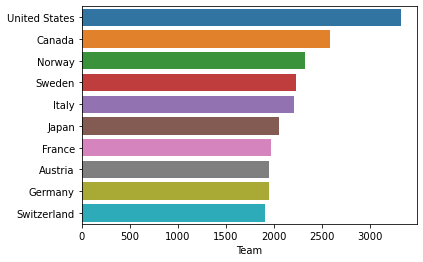

In [193]:
sns.barplot(x = top_10, y = top_10.index)

Text(0.5, 1.0, 'Age distribution of participants')

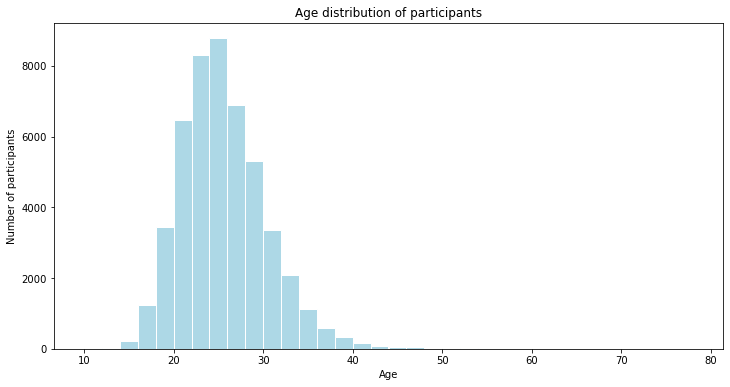

In [194]:
#Lets find Age distribution of participants in winter games
plt.figure(figsize = (12,6))
plt.hist(df['Age'], np.arange(10,80,2), color = 'lightblue', edgecolor = 'white')
plt.xlabel('Age')
plt.ylabel('Number of participants')
plt.title('Age distribution of participants')

In [195]:
#What is the number of female and male participants
gender = df['Sex'].value_counts()
gender 

M    33485
F    15079
Name: Sex, dtype: int64

In [196]:
#lets find the number of female participants over the years

participation = df[df['Sex'] == 'F'][['Year','Sex']]
participation = participation.groupby('Year').count().reset_index()
participation


,Year,Sex
0,1924,17
1,1928,33
2,1932,22
3,1936,81
4,1948,133
5,1952,185
6,1956,246
7,1960,295
8,1964,404
9,1968,416


<AxesSubplot:title={'center':'Female participation in each year'}, xlabel='Year', ylabel='count'>

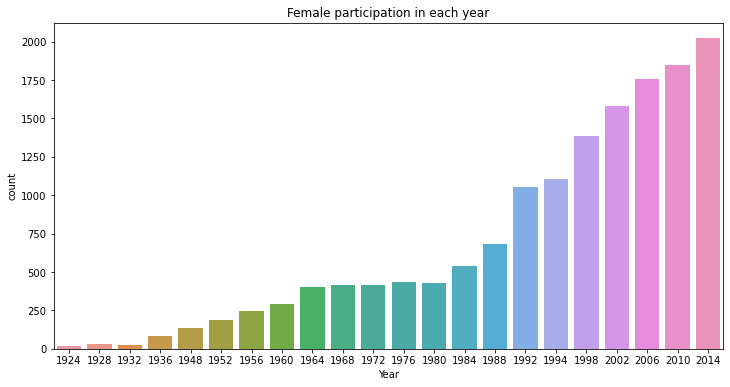

In [199]:
fmle = df[df['Sex'] == 'F'].reset_index()
plt.figure(figsize = (12,6))
plt.title('Female participation in each year')
sns.countplot(x = 'Year', data = fmle)




<AxesSubplot:title={'center':'Male participation in each year'}, xlabel='Year', ylabel='count'>

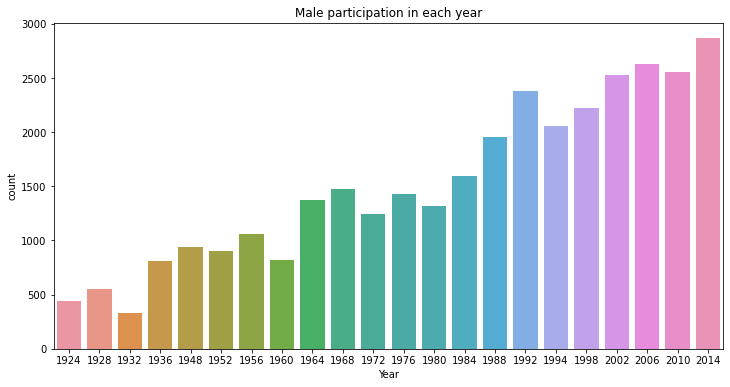

In [200]:
Male = df[df['Sex'] == 'M'].reset_index()
plt.figure(figsize = (12,6))
plt.title('Male participation in each year')
sns.countplot(x = 'Year', data = Male)

In [201]:
#We have female partcipation but lets find all the female medalists over the years
Fmle_medals = fmle.groupby(['Medal','Year']).size().reset_index().pivot(columns = 'Medal', index = 'Year', values = 0).reset_index()


In [202]:
#Lets drop No medal column as we only want female medalists
Fmle_medals.drop(['No medal'], inplace = True, axis = 1)


In [203]:
Fmle_medals

Medal,Year,Bronze,Gold,Silver
0,1924,2,2,2
1,1928,2,2,2
2,1932,2,2,2
3,1936,3,3,3
4,1948,5,5,5
5,1952,6,6,6
6,1956,9,9,9
7,1960,13,13,13
8,1964,13,15,18
9,1968,14,15,17


In [204]:
Male_medals = Male.groupby(['Medal', 'Year']).size().reset_index().pivot(columns ='Medal', index ='Year', values = 0).reset_index()


In [205]:
Male_medals.drop(['No medal'], inplace = True, axis = 1)

In [206]:
Male_medals

Medal,Year,Bronze,Gold,Silver
0,1924,35,53,36
1,1928,29,28,26
2,1932,26,30,30
3,1936,32,33,34
4,1948,41,36,43
5,1952,41,39,38
6,1956,41,42,40
7,1960,36,37,35
8,1964,45,46,49
9,1968,49,51,53


<AxesSubplot:title={'center':'Female medalists over the years'}, xlabel='Year'>

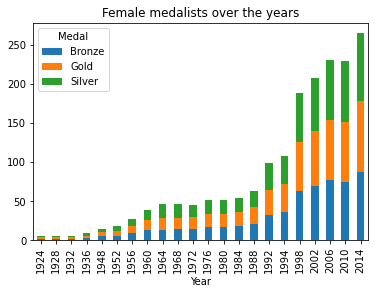

In [207]:
Fmle_medals.plot(x = 'Year', stacked = True, kind = 'bar', title = 'Female medalists over the years')

In [1]:
Male_medals.plot(x ='Year', stacked = True, kind = 'bar', title = 'Male participation over the years')


NameError: name 'Male_medals' is not defined

In [209]:
#Lets find top 10 male medalists
top_male = Male[(Male['Medal'] == 'Gold') | (Male['Medal'] == 'Silver') | (Male['Medal'] == 'Bronze') ].groupby(['Sport','Team','Name'])['Medal'].count().sort_values(ascending = False).reset_index()


top_male.head(10)

,Sport,Team,Name,Medal
0,Biathlon,Norway,Ole Einar Bjrndalen,13
1,Cross Country Skiing,Sweden,Edy Sixten Jernberg,9
2,Alpine Skiing,Norway,Kjetil Andr Aamodt,8
3,Biathlon,Germany,Ricco Gro,8
4,Biathlon,Germany,Sven Fischer,8
5,Short Track Speed Skating,United States,Apolo Anton Ohno,8
6,Speed Skating,Netherlands,Sven Kramer,7
7,Cross Country Skiing,Finland,Veikko Johannes Hakulinen,7
8,Nordic Combined,Austria,Felix Gottwald,7
9,Speed Skating,Norway,Ivar Eugen Ballangrud (Eriksen-),7


In [210]:
#Lets find top 10 female medalists
top_female= fmle[(fmle['Medal'] == 'Gold') | (fmle['Medal'] == 'Silver')| (fmle['Medal'] == 'Bronze')].groupby(['Sport', 'Team','Name'])['Medal'].count().sort_values( ascending = False).reset_index().head(10)
top_female

,Sport,Team,Name,Medal
0,Cross Country Skiing,Norway,Marit Bjrgen,10
1,Short Track Speed Skating,China,Yang Yang,10
2,Cross Country Skiing,Italy,Stefania Belmondo,10
3,Speed Skating,Germany,Claudia Pechstein,9
4,Cross Country Skiing,Soviet Union,Raisa Petrovna Smetanina,9
5,Biathlon,Germany,"Ursula ""Uschi"" Disl",9
6,Cross Country Skiing,Soviet Union,Galina Alekseyevna Kulakova,8
7,Speed Skating,East Germany,"Karin Enke-Kania (-Busch-, -Richter)",8
8,Speed Skating,Germany,Gunda Niemann-Stirnemann-Kleemann,8
9,Speed Skating,Netherlands,"Irene Karlijn ""Ireen"" Wst",8


# Conclusion
1.From the data we found that 7.33 percent of data was missing.
 
2.We then found the top 10 participating countries which were:
United States    
Canada          
Norway          
Sweden           
Italy            
Japan            
France           
Austria          
Germany          
Switzerland

3.We then found the Age distribution of our participants and found that the youngest participant was 10 years old which was really cool, our oldest was 80.

4.Next we found counted the number of female and male participants and found:
that the Males were 33485 and the Females were 15079.

5.We then found both the female and male participation over the years and saw an increase in both the females and males over the years.

6.Since the dataset contains Olympics participants and medalists, for this part I wanted to focus solely on the female and male medalists. So I filtered the data to return only Olympic medalists and saw that as the number of medalists increased both genders over the years.

7.We end our analysis by finding the top 10 Olympic medalists for both genders.
